# Title

**Exercise: B.1 - Finding best k in kNN regression**

# Description

The goal here is to **find the value of k of the best performing model** based on the test MSE.


<img src="../img/plot4.png" style="width: 500px;">

# Instructions:
- Read the data into a dataframe object using **pandas.read_csv**
- Select the sales column as the response variable and TV budget column as the predictor variable
- Make a train-test split using **sklearn.model_selection.train_test_split**
- Create a list of **integer** k values using **numpy.linspace**
- For each value of k
    - Fit a knn regression on train set
    - Calculate MSE on test set and store it
- Plot the test MSE values for each k
- Find the k value associated with the lowest test MSE

# Hints:
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split(X,y)</a> : Split arrays or matrices into random train and test subsets. 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" target="_blank">np.linspace()</a> : Returns evenly spaced numbers over a specified interval.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html" target="_blank">KNeighborsRegressor(n_neighbors=k_value)</a> : Regression-based on k-nearest neighbors.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" target="_blank">mean_squared_error()</a> : Computes the mean squared error regression loss.

<a href="https://www.geeksforgeeks.org/python-dictionary-keys-method/?ref=lbp" target="_blank">dict.keys()</a> : returns a view object that displays a list of all the keys in the dictionary.

<a href="https://www.programiz.com/python-programming/methods/dictionary/values" target="_blank">dict.values()</a> : returns a list of all the values available in a given dictionary.

<a href="https://www.tutorialspoint.com/python/dictionary_items.htm" target="_blank">dict.items()</a> : returns a list of dict's (key, value) tuple pairs

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

### Reading the standard Advertising dataset

In [3]:
# Data set used in this exercise

data_filename = 'Advertising.csv'

# Read advertising.csv file using the pandas library (using pandas.read_csv)
df = pd.read_csv(data_filename)

In [4]:
# again, take a quick look at the data

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Select the 'TV' column as predictor variable and 'Sales' column as response variable 

x = df[['TV']]
y = df['Sales']

### Train-Test split

In [7]:
### edTest(test_shape) ###
# Split the dataset in training and testing with 60% training set and 40% testing set 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=66)

In [8]:
### edTest(test_nums) ###
# Choosing k range from 1 to 70
k_value_min = 1
k_value_max = 70

# creating list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=70,dtype=int)

### Model fit

In [29]:
# hint mean_squared_error

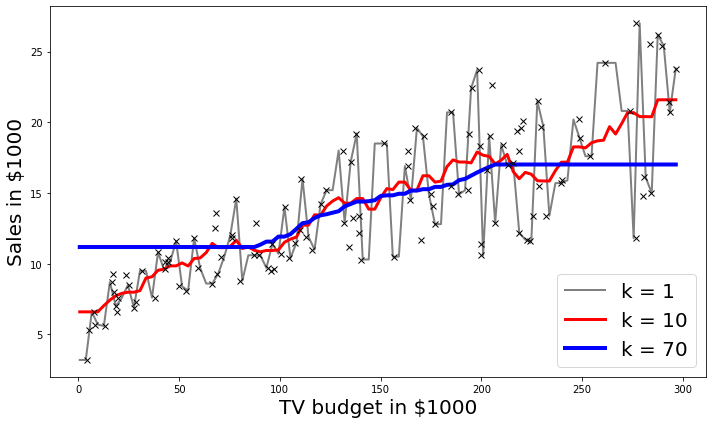

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

# creating a dictionary for storing k value against MSE fit {k: MSE@k} 

knn_dict = {}
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(x_train, y_train)
    
    # predictions
    y_pred = model.predict(x_test)
    
    # Calculating MSE 
    MSE = np.mean((y_test - y_pred) ** 2)

    
    #Storing the MSE values of each k value in a dictionary
    knn_dict[k_value] = MSE
    
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

### Graph plot

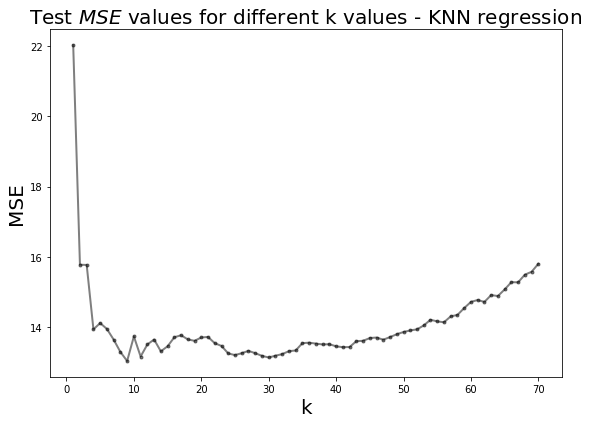

In [11]:
# Plot k against MSE

plt.figure(figsize=(8,6))
plt.plot(knn_dict.keys(), knn_dict.values(),'k.-',alpha=0.5,linewidth=2)

plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()

### Find the best knn model

In [12]:
### edTest(test_mse) ###

# Looking for k with minimum MSE

key_list = list(knn_dict.keys())
value_list = list(knn_dict.values())

min_mse = min(knn_dict.values())
position = value_list.index(min_mse)  # get index of the min mse

best_model = key_list[position]      # HINT YOU MAY USE LIST COMPREHENSION 
print ("The best k value is ",best_model,"with a MSE of ", min_mse)

The best k value is  9 with a MSE of  13.04548302469136


## How good is your model?

### From the options below, how would you classify your model?

1. Good
2. Satisfactory
3. Bad

In [15]:
# Run this cell to calculate the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=best_model)
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")

The R2 score for your model is 0.5492900595652463


### After observing the $R^2$ value, how would you now classify your model?

1. Good
2. Satisfactory
3. Bad